 
## Paso 1: Cargar las librerias:

In [10]:
#######################
#----- Librerias -----#
#######################

import pandas as pd
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap
import folium.plugins as plugins
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

############################
#----- Carga de datos -----#
############################
ciudades = ['Barcelona', 'Euskadi', 'Girona', 'Madrid', 'Malaga', 'Mallorca', 'Menorca', 
            'Sevilla', 'Valencia']
tmp = []
for i in range(len(ciudades)):
    a = 'listings_'
    b = ciudades[i]
    c = '.csv'
    d = a+b+c
    res = pd.read_csv('dat/'+d, encoding="UTF-8", parse_dates = ['last_review'], dtype = {"price":"float"})
    res['ciudad']= b
    tmp.append(res)

usuarios =pd.DataFrame([])
for i in range(len(ciudades)):
    usuarios = usuarios.append(tmp[i])
usuarios.rename(columns={"id": "id_usuario", "name": "nombre", "host_id": "id_host", 
                         "host_name": "nombre_host","neighbourhood_group":"grupo", 
                         "neighbourhood": "barrio", "latitude": "latitud", 
                         "longitude": "longitud", "room_type": "tipo_habitacion",
                         "price": "precio", "minimum_nights": "noches_minimas",
                         "number_of_reviews": "numero_visitas","last_review":"ultima_visita",
                         "reviews_per_month":"visitas_mes",
                         "calculated_host_listings_count": "lista_host", 
                         "availability_365": "disponibilidad"}, inplace=True)

usuarios

,id_usuario,nombre,id_host,nombre_host,grupo,barrio,latitud,longitud,tipo_habitacion,precio,noches_minimas,numero_visitas,ultima_visita,visitas_mes,lista_host,disponibilidad,ciudad
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130.0,3,1,2015-10-10,0.02,31,251,Barcelona
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60.0,1,16,2019-08-04,0.21,31,52,Barcelona
2,21605,Nice and sunny duble room,82522,Meritxell,Sant Martí,el Poblenou,41.40560,2.19821,Private room,33.0,2,125,2019-09-08,3.05,2,3,Barcelona
3,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210.0,3,49,2019-09-10,0.47,2,326,Barcelona
4,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,45.0,1,254,2019-09-10,2.29,1,77,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,39003184,apartamento en la playa con wifi,58803405,Carlos,POBLATS DEL SUD,EL PERELLONET,39.30533,-0.29295,Entire home/apt,50.0,2,0,NaT,NaN,2,174,Valencia
7229,39010933,Private double room Habitación doble privado,6499518,Berndt,POBLATS MARITIMS,NATZARET,39.44841,-0.33514,Private room,18.0,2,0,NaT,NaN,3,176,Valencia
7230,39020487,Cozy Room near Ciudad de las Artes & the beach,60525307,Ines,CAMINS AL GRAU,AIORA,39.46190,-0.33881,Private room,20.0,3,0,NaT,NaN,2,34,Valencia
7231,39021228,Habitación para 2 personas en el barrio del ca...,80863744,Carlos,CIUTAT VELLA,EL PILAR,39.47468,-0.38275,Private room,17.0,2,0,NaT,NaN,1,15,Valencia


In [ ]:
pip install plotly==4.3.0

## Análisis de Disponibilidad y Tipo de Habitación:


### Creación de variable de disponibilidad:

Para analizar la disponiblidad de los Airb&b en las distintas ciudades, se crearon parámetros en donde se los define según el número de días:

* Si su disponibilidad es mayor o igual a 1 mes.
* Si su disponibilidad es mayor o igual a 3 meses.
* Si su disponibilidad es mayor o igual a 6 meses.
* Si su disponibilidad es mayor o igual a 9 meses.
* Si su disponibilidad es mayores a 9 meses.


In [11]:
##############################################
#----- Crear variable de disponibilidad -----#
##############################################

def disponible (x):
    if x <= 31:
        return 'disponibilidad baja (<= 31)'
    elif x <= 93:
        return 'disponibilidad media baja (<= 93)'
    elif x <= 186:
        return 'disponibilidad media alta (<= 186)'
    elif x <= 279:
        return 'disponibilidad alta (<= 279)'
    else:
        return 'disponibilidad muy alta (> 279)'
    
usuarios['tipo_disponibilidad'] = usuarios.apply(lambda x: disponible(x.disponibilidad) , axis=1)
usuarios.head()

,id_usuario,nombre,id_host,nombre_host,grupo,barrio,latitud,longitud,tipo_habitacion,precio,noches_minimas,numero_visitas,ultima_visita,visitas_mes,lista_host,disponibilidad,ciudad,tipo_disponibilidad
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130.0,3,1,2015-10-10,0.02,31,251,Barcelona,disponibilidad alta (<= 279)
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60.0,1,16,2019-08-04,0.21,31,52,Barcelona,disponibilidad media baja (<= 93)
2,21605,Nice and sunny duble room,82522,Meritxell,Sant Martí,el Poblenou,41.40560,2.19821,Private room,33.0,2,125,2019-09-08,3.05,2,3,Barcelona,disponibilidad baja (<= 31)
3,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210.0,3,49,2019-09-10,0.47,2,326,Barcelona,disponibilidad muy alta (> 279)
4,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,45.0,1,254,2019-09-10,2.29,1,77,Barcelona,disponibilidad media baja (<= 93)


### Análisis Barcelona:

Una vez creada la nueva variable del **tipo de disponiblidad**, tomaremos a una ciudad como ejemplo que en este caso será Barcelona. Lo que estamos intentando hacer es interpretar como una de las ciudades más importantes de España se comporta.
Paralelamente, se realizará el análisis de la distribución del tipo de habitación por región en la ciudad.

In [12]:
usuarios_barcelona = usuarios[usuarios.ciudad.isin(['Barcelona'])]
usuarios_barcelona.head()

,id_usuario,nombre,id_host,nombre_host,grupo,barrio,latitud,longitud,tipo_habitacion,precio,noches_minimas,numero_visitas,ultima_visita,visitas_mes,lista_host,disponibilidad,ciudad,tipo_disponibilidad
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130.0,3,1,2015-10-10,0.02,31,251,Barcelona,disponibilidad alta (<= 279)
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60.0,1,16,2019-08-04,0.21,31,52,Barcelona,disponibilidad media baja (<= 93)
2,21605,Nice and sunny duble room,82522,Meritxell,Sant Martí,el Poblenou,41.40560,2.19821,Private room,33.0,2,125,2019-09-08,3.05,2,3,Barcelona,disponibilidad baja (<= 31)
3,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210.0,3,49,2019-09-10,0.47,2,326,Barcelona,disponibilidad muy alta (> 279)
4,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,45.0,1,254,2019-09-10,2.29,1,77,Barcelona,disponibilidad media baja (<= 93)


En la tabla inferior podemos ver un análisis descriptivo para **Barcelona**, en donde su valor medio, se encuentra en 173 días de disponibilidad que es alrededor de 6 meses. 

In [13]:
usuarios_barcelona.describe()

,id_usuario,id_host,latitud,longitud,precio,noches_minimas,numero_visitas,visitas_mes,lista_host,disponibilidad
count,2.040400e+04,2.040400e+04,20404.000000,20404.000000,20404.000000,20404.000000,20404.000000,16077.000000,20404.000000,20404.000000
mean,2.221167e+07,9.314832e+07,41.391921,2.167638,134.032837,8.525926,34.470153,1.831600,14.214664,173.328514
std,1.202739e+07,9.523825e+07,0.014974,0.017992,473.083008,18.934963,60.658949,1.697443,29.017481,131.254315
min,1.866600e+04,3.073000e+03,41.349540,2.088380,6.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.290682e+07,8.110619e+06,41.380220,2.157050,40.000000,1.000000,1.000000,0.480000,1.000000,46.000000
50%,2.364433e+07,4.833293e+07,41.388750,2.168250,61.000000,2.000000,8.000000,1.300000,2.000000,165.000000
75%,3.335625e+07,1.707161e+08,41.402102,2.178040,109.000000,4.000000,40.000000,2.780000,11.000000,310.000000
max,3.867327e+07,2.954833e+08,41.463260,2.231030,10000.000000,900.000000,671.000000,19.500000,153.000000,365.000000


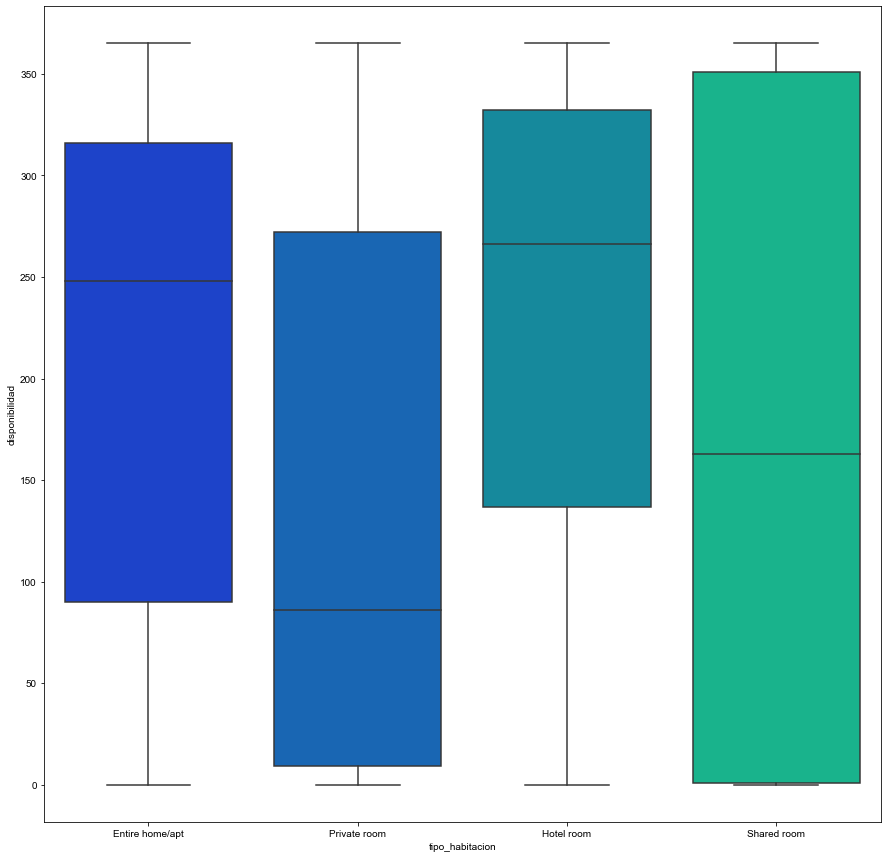

In [5]:
fig, ax = plt.subplots(figsize = (15 , 15))
out = sns.boxplot(x = 'tipo_habitacion', y='disponibilidad', data = usuarios_barcelona, palette="winter")
sns.set(font_scale=1)

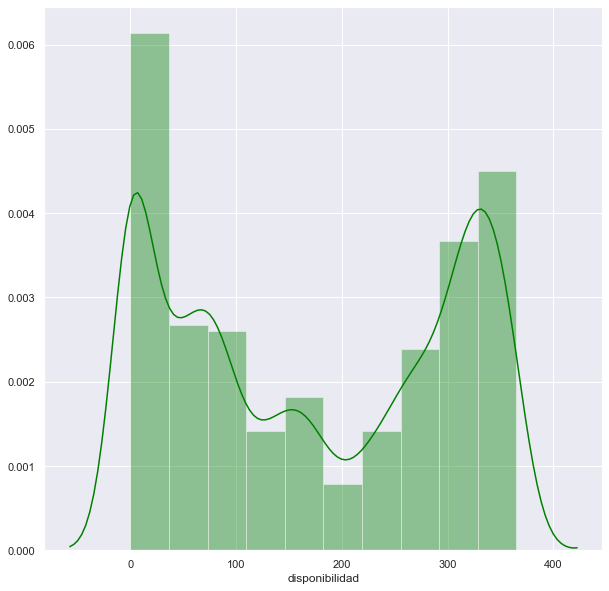

In [14]:
fig, ax = plt.subplots(figsize = (10 , 10))
out = sns.distplot(usuarios_barcelona.disponibilidad, bins = 10, color = 'green')
sns.set(font_scale=1)

Según su diagrama de caja y su histograma, se puede entender que la mayoría de datos estan distribuidos a los extremos, semejante a una distribución _Beta_. 


Si analizamos las variables del diagrama de caja podemos sacar varias conclusiones:

* El tipo de habitación **Shared room** esta distribuida mejor a lo largo de los datos, sin embargo, si revisamos los datos en la tabla de abajo podemos ver que **share room** no tiene muchos datos.
* **Entire home/apt y Private room** sus datos estan distribuidos más hacia los 365 días de disponibilidad.
* **Private** sus distribución de disponibilidad se acerca más hacia la disponibilidad baja.

In [15]:
usuarios_barcelonatop = usuarios_barcelona.pivot_table(index=['grupo', 'tipo_habitacion'], 
                                columns='tipo_disponibilidad',
                                values='disponibilidad', aggfunc='median', dropna=True)
usuarios_barcelonatop_1 = usuarios_barcelonatop.reset_index()
usuarios_barcelonatop

tipo_disponibilidad                  disponibilidad alta (<= 279)  \
grupo               tipo_habitacion                                 
Ciutat Vella        Entire home/apt                         258.0   
                    Hotel room                              245.0   
                    Private room                            247.0   
                    Shared room                               NaN   
Eixample            Entire home/apt                         243.0   
                    Hotel room                              248.0   
                    Private room                            249.0   
                    Shared room                             259.0   
Gràcia              Entire home/apt                         240.0   
                    Hotel room                              268.0   
                    Private room                            258.5   
                    Shared room                               NaN   
Horta-Guinardó      Entire home/apt                         237.0   
                    Hotel room                              238.0   
                    Private room                            259.0   
                    Shared room                               NaN   
Les Corts           Entire home/apt                         249.0   
                    Hotel room                              254.0   
                    Private room                            236.0   
                    Shared room                               NaN   
Nou Barris          Entire home/apt                         245.0   
                    Hotel room                                NaN   
                    Private room                            249.0   
                    Shared room                               NaN   
Sant Andreu         Entire home/apt                         234.0   
                    Hotel room                              261.0   
                    Private room                            256.0   
                    Shared room                               NaN   
Sant Martí          Entire home/apt                         244.0   
                    Hotel room                              265.0   
                    Private room                            259.0   
                    Shared room                               NaN   
Sants-Montjuïc      Entire home/apt                         244.0   
                    Hotel room                              255.0   
                    Private room                            257.0   
                    Shared room                             229.5   
Sarrià-Sant Gervasi Entire home/apt                         252.0   
                    Hotel room                              254.0   
                    Private room                            239.0   
                    Shared room                               NaN   

tipo_disponibilidad                  disponibilidad baja (<= 31)  \
grupo               tipo_habitacion                                
Ciutat Vella        Entire home/apt                          2.0   
                    Hotel room                               2.0   
                    Private room                             0.0   
                    Shared room                              0.0   
Eixample            Entire home/apt                          0.0   
                    Hotel room                               2.0   
                    Private room                             0.0   
                    Shared room                              0.0   
Gràcia              Entire home/apt                          0.0   
                    Hotel room                              19.5   
                    Private room                             0.0   
                    Shared room                              0.0   
Horta-Guinardó      Entire home/apt                          0.0   
                    Hotel room                               NaN   
             

In [16]:
# Calcular la cantidad de Barrios
barrios = usuarios.groupby('barrio').id_usuario.count()
cantidad_barrios = len(barrios) 

# Calcular la cantidad de airbnb por barrio
barrios = pd.DataFrame(barrios)

#Conteo de tipo de habitaciones por grupo
barcelona = usuarios[usuarios.ciudad.isin(['Barcelona'])]
barcelona_tophabit = barcelona.pivot_table(index=['grupo','tipo_habitacion'],
                                values='disponibilidad', aggfunc='count')
barcelona_tophabit_1 = barcelona_tophabit.reset_index()

# Conteo total de los 4 tipos de habitaciones juntos en uno solo numero por grupo.
barcelona_2 = barcelona_tophabit_1.groupby(["grupo"]).sum()

# Union de las dos tablas anteriores
barcelona_3 = barcelona_tophabit_1.merge(barcelona_2, on="grupo")

# Creo la columna "Porecntaje".
barcelona_3["Porcentaje"] = (barcelona_3["disponibilidad_x"] / barcelona_3["disponibilidad_y"]) * 100

# Elimino dos columnas que solo me sirvieron para poder calcular el porcentaje.
barcelona_3 = barcelona_3.drop(['disponibilidad_x', "disponibilidad_y"], axis=1)

barcelona_4 = barcelona_3.pivot_table(index=["grupo"],
                          columns="tipo_habitacion",
                          values="Porcentaje")
barcelona_4
barcelona_5 = barcelona_4.reset_index()
barcelona_5

tipo_habitacion,grupo,Entire home/apt,Hotel room,Private room,Shared room
0,Ciutat Vella,42.479339,2.458678,54.483471,0.578512
1,Eixample,49.518875,5.980755,43.908216,0.592154
2,Gràcia,46.453089,4.691076,47.940503,0.915332
3,Horta-Guinardó,32.200886,0.738552,66.617430,0.443131
4,Les Corts,37.757437,4.576659,54.462243,3.203661
5,Nou Barris,15.853659,1.219512,80.894309,2.032520
6,Sant Andreu,25.135135,1.351351,71.351351,2.162162
7,Sant Martí,42.196796,2.562929,54.736842,0.503432
8,Sants-Montjuïc,43.207312,2.451184,53.095139,1.246365
9,Sarrià-Sant Gervasi,50.473613,3.112314,46.143437,0.270636


Esta tabla representa el **porcentaje** de cada **tipo de habitacion** para cada **grupo** de la ciudad de **Barcelona**. 

In [17]:
bar = go.Figure(data=[ 
    go.Bar(name="Entire home/apt", x=barcelona_5.grupo, y=barcelona_5["Entire home/apt"]), 
    go.Bar(name="Hotel room", x=barcelona_5.grupo, y=barcelona_5["Hotel room"]), 
    go.Bar(name="Private room", x=barcelona_5.grupo, y=barcelona_5["Private room"]), 
    go.Bar(name="Shared room", x=barcelona_5.grupo, y=barcelona_5["Shared room"])
]) 
bar 
bar.update_layout( 
    barmode='group', 
    title="Porcentaje por Habitacion y Grupo de Barcelona", 
    xaxis_title="Grupos", 
    yaxis_title="Porcentaje por Habitacion", 
    font=dict( family="Times New Roman", size=17 )
) 
bar.show()

**Conclusion**:
En este grafico representamos la distribución de los tipos de hospedaje de Airbnb en la cuidad de **Barcelona**. Vemos que destaca la diferencia que hay en el grupo **Nou Barris**, donde las **habitaciones privadas** conforman un **80.89%** del grupo, mientras que el **departamento entero**, un **15.85%**.  También se puede ver las bajas cantidades de **habitaciones de hotel** y más escasos aun, **la habitación compartida**.